Load The Data:

In [2]:
import pandas as pd
# Load the earthquake dataset
df = pd.read_csv('/content/earthquake_data.csv')

df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


Check and Clean Null values:

In [3]:
# Check for missing values:
print(df.isnull().sum())

df.dropna(subset=['magnitude', 'depth', 'latitude', 'longitude'], inplace=True)

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64


Making the Data Consistent:

In [6]:
# Convert the date column to a datetime object
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Ensure magnitude values are properly formatted as floating-point numbers
df['magnitude'] = df['magnitude'].astype(float)


<ipython-input-6-450d7cd7c820>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')


Analyzing Magnitude Distribution

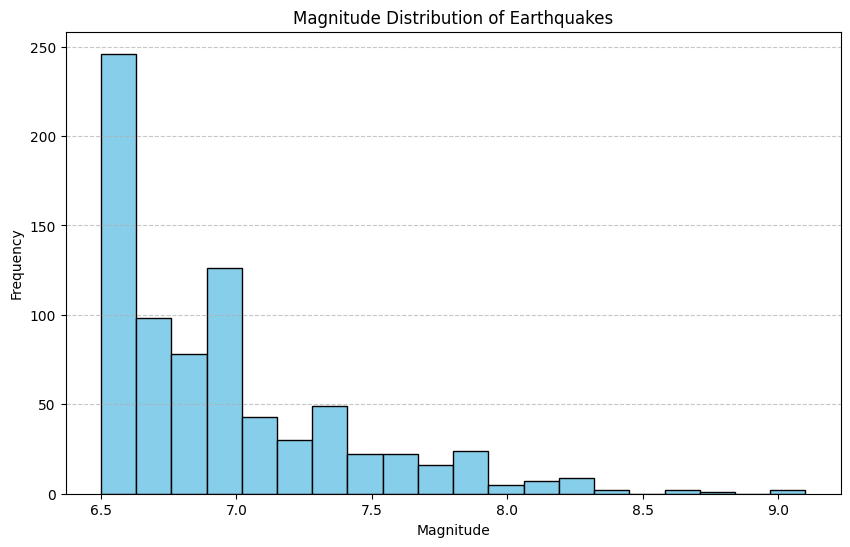

In [10]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/mnt/data/earthquake_data.csv'
earthquake_data = pd.read_csv('/content/earthquake_data.csv')
earthquake_data = earthquake_data.dropna(subset=['magnitude'])
plt.figure(figsize=(10, 6))
plt.hist(earthquake_data['magnitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Magnitude Distribution of Earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Analyzing Depth Distribution

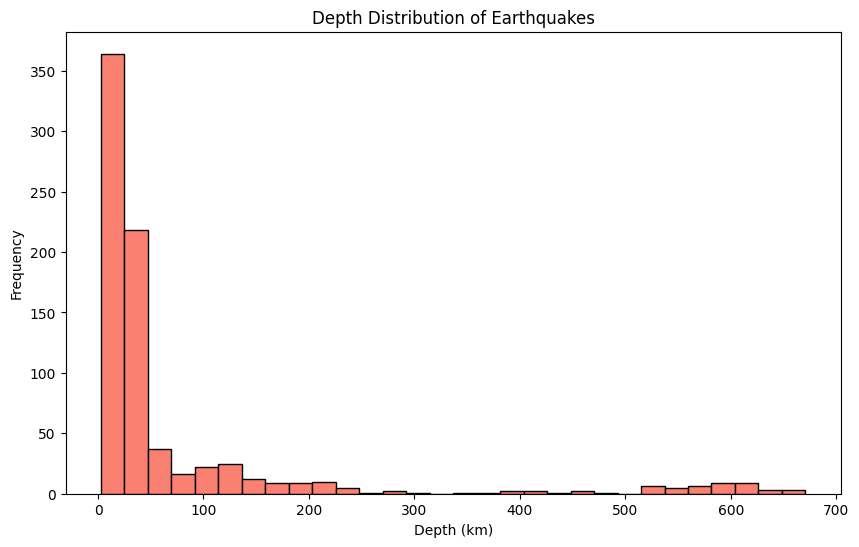

In [11]:
# Plot the distribution of earthquake depths
plt.figure(figsize=(10, 6))
plt.hist(df['depth'], bins=30, color='salmon', edgecolor='black')
plt.title('Depth Distribution of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()


Exploring the Relationship between Magnitude and Depth

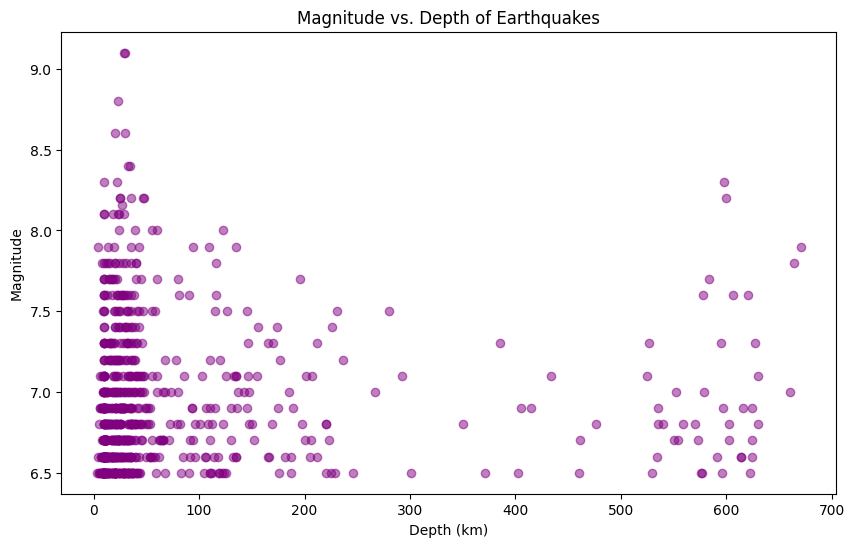

In [12]:
# Scatter plot of magnitude vs. depth
plt.figure(figsize=(10, 6))
plt.scatter(df['depth'], df['magnitude'], alpha=0.5, color='purple')
plt.title('Magnitude vs. Depth of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


Mapping Earthquake Locations

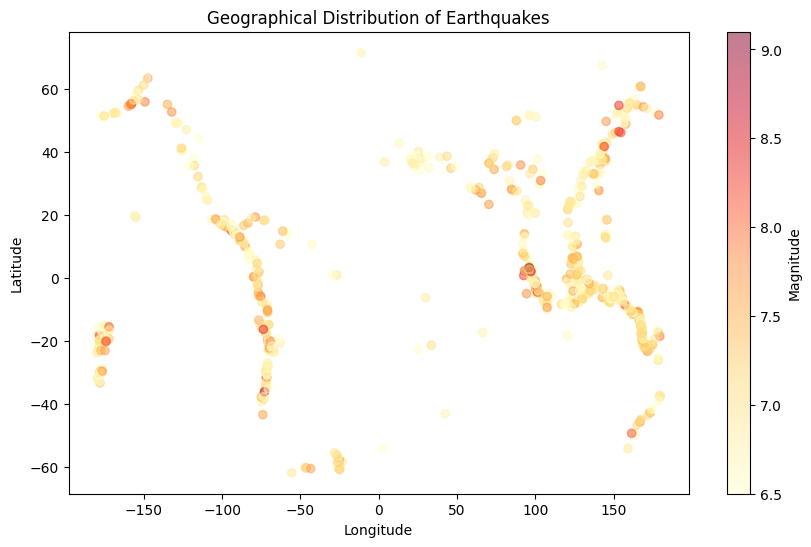

In [13]:
# Scatter plot of earthquake locations
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['magnitude'], cmap='YlOrRd')
plt.colorbar(label='Magnitude')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Earthquake Trends Over Time

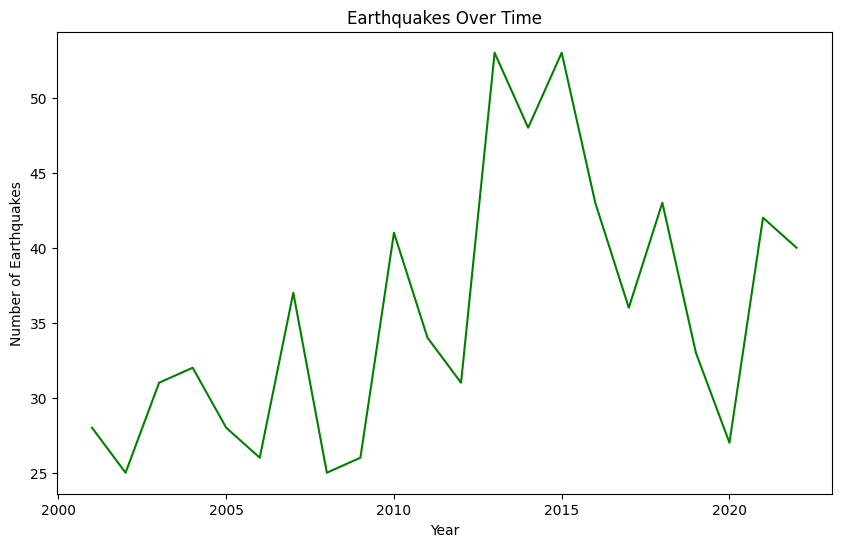

In [15]:
# Extract the year from the date column
df['year'] = df['date_time'].dt.year

# Count earthquakes per year and plot
earthquakes_per_year = df.groupby('year').size()

plt.figure(figsize=(10, 6))
earthquakes_per_year.plot(kind='line', color='green')
plt.title('Earthquakes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()
